<a href="https://colab.research.google.com/github/kkaisar/introtoML/blob/main/task1_6demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dot product performance measurement:
dot_loop: 0.11612153900000521
dot_sum: 0.01812208400002646
dot_np: 0.0003391590000205724


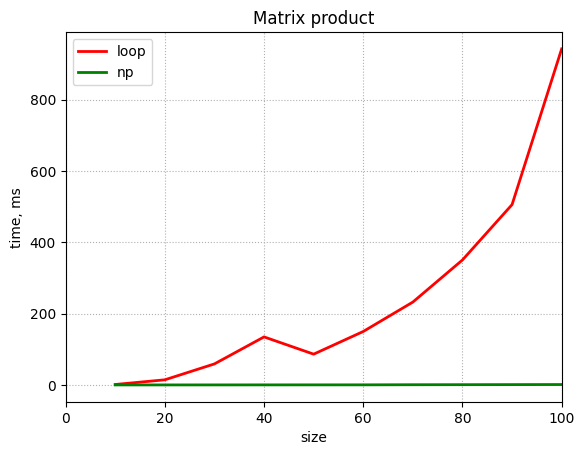

In [6]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from time import time
import timeit  # Импортируем модуль timeit

# Функции для вычисления скалярного произведения
def dot_loop(a, b):
    result = 0
    for i in range(len(a)):
        result += a[i] * b[i]
    return result

def dot_sum(a, b):
    return sum(a * b)

def dot_np(a, b):
    return a @ b

# Тестирование корректности функций на небольших размерах
for n in range(1, 21):  # Ограничение до 20
    a = np.random.randn(n)
    b = np.random.randn(n)
    assert np.allclose(dot_loop(a, b), dot_sum(a, b))
    assert np.allclose(dot_loop(a, b), dot_np(a, b))

# Измерение производительности
n = 1000
a = np.random.randn(n)
b = np.random.randn(n)

# Измерение времени выполнения каждой функции
print("Dot product performance measurement:")
print("dot_loop:", timeit.timeit(lambda: dot_loop(a, b), number=100))
print("dot_sum:", timeit.timeit(lambda: dot_sum(a, b), number=100))
print("dot_np:", timeit.timeit(lambda: dot_np(a, b), number=100))

# Функции для умножения матриц
def mat_mul_loop(A, B):
    m, n = A.shape
    p = B.shape[1]
    result = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                result[i, j] += A[i, k] * B[k, j]
    return result

def mat_mul_np(A, B):
    return A @ B

# Тестирование корректности функций для умножения матриц
def TestMatrices(n_max):
    for n in range(1, n_max):
        m = np.random.randint(1, n_max)
        p = np.random.randint(1, n_max)
        A = np.random.randn(m, n)
        B = np.random.randn(n, p)
        prod_loop = mat_mul_loop(A, B)
        prod_np = mat_mul_np(A, B)
        assert np.allclose(prod_loop, prod_np)

# Выполнение тестов для матриц
TestMatrices(10)

# Функции для измерения времени выполнения умножения матриц
def measure_time(func, m, n, p, n_samples=5):  # Уменьшение до 5
    result = np.zeros(n_samples)
    for i in range(n_samples):
        begin = time()
        func(np.random.randn(m, n), np.random.randn(n, p))
        result[i] = time() - begin
    return result.mean()

def get_times_lists(func, step=10, max_size=100, n_samples=5):  # Уменьшение до 5
    times = []
    sizes = np.arange(step, max_size + 1, step)
    for size in sizes:
        times.append(measure_time(func, size, size, size, n_samples))
    return np.array(times)

# Построение графиков времени выполнения
def plot_time_vs_size(step=10, max_size=100, n_samples=5):  # Уменьшение до 5
    loop_times = 1000 * get_times_lists(mat_mul_loop, step, max_size, n_samples)
    np_times = 1000 * get_times_lists(mat_mul_np, step, max_size, n_samples)
    sizes = np.arange(step, max_size + 1, step)
    plt.plot(sizes, loop_times, c='r', lw=2, label="loop")
    plt.plot(sizes, np_times, c='g', lw=2, label="np")
    plt.xlim(0, max_size)
    plt.title("Matrix product")
    plt.legend()
    plt.xlabel("size")
    plt.ylabel("time, ms")
    plt.grid(ls=":")
    plt.show()

# Вызов функции для построения графиков
plot_time_vs_size()
